# Projeto Final - Fitbit Fitness Data
## Tabela de Conteúdos

* [1. Definição do problema](#section-one)
    - [Bibliotecas que iremos usar no nosso Projeto](#subsection-one)
    
    
* [2. Apresentação dos dados](#section-two)
    - [Lendo os arquivos .csv](#subsection2-one)
    - [Convertendo os arquivos .csv em .parquet](#subsection2-two)
    - [Lendo os arquivos .parquet](#subsection2-three)
    - [Entendendo um pouco dos dados](#subsection2-four)
        - [Número de usuários únicos](#subsection2-five)


* [3. Preparação dos dados](#section-three)
   - [Limpeza dos Dados](#subsection3-one)
       - [Descartando NA e duplicatas](#subsection3-two)
       - [Limpando os nomes para o formato usado nas aulas](#subsection3-three)
       - [Transformando as Datas](#subsection3-four)
           - [Transformações extras](#subsection3-five)


* [4. Análise dos dados](#section-four)
   - [Analisando](#subsection4-one)
       - [Calorias x Passos](#subsection4-two)
       - [Calorias x Intensidade](#subsection4-three)
       - [Total de Passos diários Vs. Total de Minutos de Sono](#subsection4-four)   
       - [Tempo de sono](#subsection4-five)
       - [Uso diário dos dispositivos](#subsection4-six)
    
* [5. Conclusão](#section-five)

<a id="section-one"></a>
# 1. Definição do problema.
Quais são algumas tendências no uso de dispositivos inteligentes?

Os dados que iremos usar para responder essa pergunta eh o FitBit Fitness Tracker Data(License CC0: Public Domain, disponível através do Mobius distribuído através do Amazon Mechanical Turk entre 12 de março de 2016 e 12 de maio de 2016.)

O conjunto de dados contém rastreamento de atividade física pessoal para 33 usuários do Fitbit. Esses usuários qualificados do Fitbit concordaram com o envio de dados de rastreamento pessoal, incluindo minutos de desempenho de condicionamento físico, frequência cardíaca e monitoramento do sono.

O aplicativo fornece aos usuários dados de saúde relacionados à atividade, sono, estresse, ciclo menstrual e hábitos de foco. Esses dados podem ajudar os usuários a entender melhor seus hábitos atuais e tomar decisões saudáveis. O aplicativo se conecta à sua linha de produtos de bem-estar inteligentes da empresa.

Temos como **objetivo** nesse **projeto** analisar os dados de uso de dispositivos inteligentes para obter informações sobre como as pessoas já estão usando seus dispositivos e usar essas tendências para entendermos e identificar possiveis
correlações e assim propor possiveis hypothesis para o frame de dado analisado. 



<a id="subsection-one"></a>
## Bibliotecas que iremos usar no nosso Projeto


In [83]:
library(janitor) # janitor has simple little tools for examining and cleaning dirty data.
library(arrow)
library(tidyverse)
library(naniar)
library(ggsci)
library(skimr) # Skim a data frame, getting useful summary statistics
library(lubridate) # Lubridate provides tools that make it easier to parse and manipulate dates.
library(ggpubr) # library and require load and attach add-on packages. stat_cor

<a id="section-two"></a>
# 2. Apresentação dos dados

Como o objetivo é identificar tendências no uso de dispositivos inteligentes, decidimos trabalhar com os cinco dataframes a seguir:

* sleepDay_merged.csv
* dailyActivity_merged.csv
* dailyIntensities_merged.csv
* hourlyIntensities_merged.csv
* hourlyCalories_merged.csv

<a id="subsection2-one"></a>
## Lendo os arquivos .csv


In [84]:
sleep_day_file <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
daily_activity_file <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_intensities_file <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
hourly_intensities_file <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourly_calories_file <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")

Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (9): Id, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, Ve...

ℹ Use `spec()` to retrieve the full column spec

<a id="subsection2-two"></a>

# Convertendo os arquivos .csv em .parquet
A partir dessa conversão iremos ganhar desempenho em nossas análises
 
O [Apache Parquet](https://www.upsolver.com/blog/apache-parquet-why-use) é um formato de arquivo projetado para oferecer suporte ao processamento rápido de dados complexos, com várias características notáveis:
* Compressão
* Evolução do esquema
* Código aberto e não proprietário
Mesmo que o uso do Parquet não seja necessário para o nosso conjunto de dados, pois não é um banco muito grande. Ainda sim nos trara um pouco mais de rapidez.

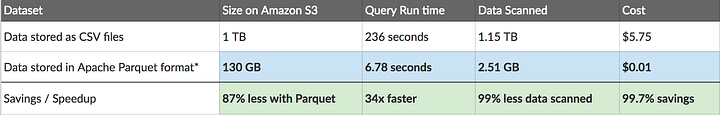

[ref.](https://blog.openbridge.com/how-to-be-a-hero-with-powerful-parquet-google-and-amazon-f2ae0f35ee04)


In [85]:
write_parquet(sleep_day_file, "/kaggle/working/sleepDay.parquet")
write_parquet(daily_activity_file, "/kaggle/working/dailyActivity.parquet")
write_parquet(daily_intensities_file, "/kaggle/working/dailyIntensities.parquet")
write_parquet(hourly_intensities_file, "/kaggle/working/hourly_intensities.parquet")
write_parquet(hourly_calories_file, "/kaggle/working/hourly_calories.parquet")

<a id="subsection2-three"></a>

# Lendo os arquivos .parquet


In [86]:
sleep_day_file <- read_parquet("/kaggle/working/sleepDay.parquet")
daily_activity_file <- read_parquet("/kaggle/working/dailyActivity.parquet")
daily_intensities_file <- read_parquet("/kaggle/working/dailyIntensities.parquet")
hourly_intensities_file <- read_parquet("/kaggle/working/hourly_intensities.parquet")
hourly_calories_file <- read_parquet("/kaggle/working/hourly_calories.parquet")


<a id="subsection2-four"></a>

# Entendendo um pouco dos dados
Aqui teremos o nome primeiro contato com o formato, conjunto dos dados que iremos trabalhar no nosso projeto

In [87]:
#skim_without_charts(sleep_day_file)
#skim_without_charts(daily_activity_file)
#skim_without_charts(daily_intensities_file)
#skim_without_charts(hourly_intensities_file)
#skim_without_charts(hourly_calories_file)

skim output foi comentado pois não estava permitindo o push no kaggle. Provavelmente, devido ao tamanho da saída.

In [88]:
glimpse(sleep_day_file)
glimpse(daily_activity_file)
glimpse(daily_intensities_file)
glimpse(hourly_intensities_file)
glimpse(hourly_calories_file)

Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <dbl> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <dbl> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…
Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.

A partir desses resultados podemos identificar que nao temos dados NA, dados faltantes em nosso conjuntos de dados. Assim como podemos ter uma média desses valores, e ver como as colunas estão organizadas.

<a id="subsection2-five"></a>

### Número de usuários únicos



In [89]:
count(distinct(sleep_day_file, Id))
count(distinct(daily_activity_file, Id))
count(distinct(daily_intensities_file, Id))
count(distinct(hourly_intensities_file, Id))
count(distinct(hourly_calories_file, Id))

n
<int>
24


n
<int>
33


n
<int>
33


n
<int>
33


n
<int>
33


<a id="section-three"></a>
# 3. Preparação dos dados

<a id="subsection3-one"></a>

## Limpeza dos Dados


In [90]:
anyDuplicated(sleep_day_file)
anyDuplicated(daily_activity_file)
anyDuplicated(daily_intensities_file)
anyDuplicated(hourly_intensities_file)
anyDuplicated(hourly_calories_file)

[1] 162

[1] 0

[1] 0

[1] 0

[1] 0

aqui podemos identificar que temos 162 duplicatas no sleep day file

<a id="subsection3-two"></a>

## Descartando NA e duplicatas

In [91]:
sleep_day_file <- sleep_day_file %>%
  distinct() %>%
  drop_na()

anyDuplicated(sleep_day_file)

[1] 0

Tratamentos dos dados feitos, e agora temos 0 dados duplicados. Esse tratamento é feito para evitar dados iguais esses dados duplicados podem trazer vieses para as nossas analises futuras.

<a id="subsection3-three"></a>

## Limpando os nomes para o formato usado nas aulas

In [92]:
sleep_day_file <- clean_names(sleep_day_file)
daily_activity_file <- clean_names(daily_activity_file)
daily_intensities_file <- clean_names(daily_intensities_file)
hourly_intensities_file <- clean_names(hourly_intensities_file)
hourly_calories_file <- clean_names(hourly_calories_file)

agora temos os nossos nomes de colunas em um formato padronizado; name1_name2 (lowcase,separado por _)


<a id="subsection3-four"></a>

## Transformando as Datas

In [93]:
glimpse(sleep_day_file)
glimpse(daily_activity_file)
glimpse(daily_intensities_file)
glimpse(hourly_intensities_file)
glimpse(hourly_calories_file)

Rows: 410
Columns: 5
$ id                   <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1…
$ sleep_day            <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM",…
$ total_sleep_records  <dbl> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ total_minutes_asleep <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430,…
$ total_time_in_bed    <dbl> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449,…
Rows: 940
Columns: 15
$ id                         <dbl> 1503960366, 1503960366, 1503960366, 1503960…
$ activity_date              <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/1…
$ total_steps                <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 130…
$ total_distance             <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ tracker_distance           <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ logged_activities_distance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_distance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 

iremos fazer a transformação das colunas que tratam de **horas e datas** para facilicar no momento das nossas analises.

In [94]:
sleep_day_file$sleep_day <- mdy_hms(sleep_day_file$sleep_day)
daily_activity_file$activity_date <- mdy(daily_activity_file$activity_date)
daily_intensities_file$activity_day <- mdy(daily_intensities_file$activity_day)
hourly_intensities_file$activity_hour <- mdy_hms(hourly_intensities_file$activity_hour)
hourly_calories_file$activity_hour <- mdy_hms(hourly_calories_file$activity_hour)


A partir do **glimpse()** podemos identificar que as  colunas referentes a hora e datas agora estão nos seguintes formatos de dados: **dttm,date**. 
Esse processamento é possível a partir da biblioteca ***lubridate*** que nos da as funções e argumentos para tratar esse tipo de situações e muito mais.

<a id="subsection3-five"></a>
### Transformações extras

tratando dados para fazer o grafico de total de [Total de Passos diários Vs. Total de Minutos de Sono](#subsection4-four)   

In [101]:
glimpse(sleep_day_file)
glimpse(daily_activity_file)


Rows: 410
Columns: 5
$ id                   <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1…
$ sleep_day            <dttm> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-16, …
$ total_sleep_records  <dbl> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ total_minutes_asleep <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430,…
$ total_time_in_bed    <dbl> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449,…
Rows: 940
Columns: 16
$ id                         <dbl> 1503960366, 1503960366, 1503960366, 1503960…
$ activity_date              <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-0…
$ total_steps                <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 130…
$ total_distance             <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ tracker_distance           <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ logged_activities_distance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_distance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 

Para dar merge() os dados diários de sono e atividade com base em ID e data, precisaremos padronizar os nomes das colunas de ID e Data.

Renomeando a coluna que exibe as datas para que possa ser usada como uma das chaves durante a merge() de dados:

In [102]:
daily_activity_file <- daily_activity_file %>% rename(date = activity_date)
sleep_day_file <- sleep_day_file %>% rename(date = sleep_day)

Merge() os subconjuntos 'sleep' e 'activity' para criar o conjunto de dados 'activity_sleep', usando "id" e "date" como chaves:

In [103]:
activity_sleep <- merge(daily_activity_file, sleep_day_file, by=c("id", "date"))


glimpse(activity_sleep)

Rows: 410
Columns: 19
$ id                         <dbl> 1503960366, 1503960366, 1503960366, 1503960…
$ date                       <date> 2016-04-12, 2016-04-13, 2016-04-15, 2016-0…
$ total_steps                <dbl> 13162, 10735, 9762, 12669, 9705, 15506, 105…
$ total_distance             <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6…
$ tracker_distance           <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6…
$ logged_activities_distance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_distance       <dbl> 1.88, 1.57, 2.14, 2.71, 3.19, 3.53, 1.96, 1…
$ moderately_active_distance <dbl> 0.55, 0.69, 1.26, 0.41, 0.78, 1.32, 0.48, 0…
$ light_active_distance      <dbl> 6.06, 4.71, 2.83, 5.04, 2.51, 5.03, 4.24, 4…
$ sedentary_active_distance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_minutes        <dbl> 25, 21, 29, 36, 38, 50, 28, 19, 41, 39, 73,…
$ fairly_active_minutes      <dbl> 13, 19, 34, 10, 20, 31, 12, 8, 21, 5, 14, 2…
$ lightly_active_m

**Abaixo** trataremos os dados para o [Grafico - Calorias x intensidade](#subsection4-three). Vamos colocar as datas em dia para conseguiremos agrupar por esse conjunto de dados, e vamos dar um **cbind()** nos valores de calorias essa função pega uma sequência de argumentos de vetor, matriz ou quadro de dados e combine por colunas ou linhas, respectivamente.

In [99]:
hourly_intensities_file$day <- format(hourly_intensities_file$activity_hour, format = "%Y %m %d")
hourly_intensities_file$calories <- cbind(hourly_calories_file$calories)
glimpse(hourly_intensities_file)

Rows: 22,099
Columns: 6
$ id                <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503…
$ activity_hour     <dttm> 2016-04-12 00:00:00, 2016-04-12 01:00:00, 2016-04-1…
$ total_intensity   <dbl> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36, …
$ average_intensity <dbl> 0.333333, 0.133333, 0.116667, 0.000000, 0.000000, 0.…
$ day               <chr> "2016 04 12", "2016 04 12", "2016 04 12", "2016 04 1…
$ calories          <dbl[,1]> <matrix[26 x 1]>


**Abaixo** adicionaremos dias da semana aos conjuntos de dados para auxiliar nas análises refentes ao gráfico [Tempo de sono](#subsection4-five)

In [131]:
sleep_day_file <- sleep_day_file %>% mutate(day_of_week = weekdays(date))
# sleep_day_file$weekday <- weekdays(sleep_day_file$sleep_day) 
sleep_day_file$day_of_week <- factor(sleep_day_file$day_of_week,levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

Aqui fizemos um mutate para adicionar a coluna referente a dias da semana. Passamos *date* para a *função* weekdays para assim termos os dias da semana refentes as data do nosso dataframe.
Em seguida, fazemos um *factor* para que os dias da semana sejam organizadas da ordem passada no vetor *c* em *levels*.

In [132]:
unique(sleep_day_file$day_of_week)


[1] Tuesday   Wednesday Friday    Saturday  Sunday    Thursday  Monday   
Levels: Monday Tuesday Wednesday Thursday Friday Saturday Sunday

testando para ver se temos os dias referentes a todos os dias da semana

**Abaixo** vamos fazer o somatório para o gráfico [Uso diário dos dispositivos](#subsection4-six) que nós apresenta a quantidade de horas que os nossos usuários passam usando os aparelhos inteligentes.

In [96]:
daily_activity_file$total_time = rowSums(daily_activity_file[c("very_active_minutes",
                                                               "fairly_active_minutes",
                                                               "lightly_active_minutes",
                                                               "sedentary_minutes")])
glimpse(daily_activity_file)

Rows: 940
Columns: 16
$ id                         <dbl> 1503960366, 1503960366, 1503960366, 1503960…
$ activity_date              <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-0…
$ total_steps                <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 130…
$ total_distance             <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ tracker_distance           <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ logged_activities_distance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_distance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3…
$ moderately_active_distance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1…
$ light_active_distance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5…
$ sedentary_active_distance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_minutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66,…
$ fairly_active_minutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, …
$ lightly_active_m

Fizemos o somatório das colunas *very_active_minutes*, *fairly_active_minutes*, *lightly_active_minutes*, *sedentary_minutes* usando a função **rowSums()**

<a id="section-four"></a>
# 4. Análise dos dados

<a id="subsection4-one"></a>

## Analisando
Nessa parte do projeto iremos dar nossas primeira olhada nos gráficos possiveis para o nosso BD.

<a id="subsection4-two"></a>

### Calorias x Passos
Agora vamos dar uma olhada nas calorias gastas pelos usuários e fazer uns graficos na tentativa de buscar alguma compreensão do que está acontecendo.


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


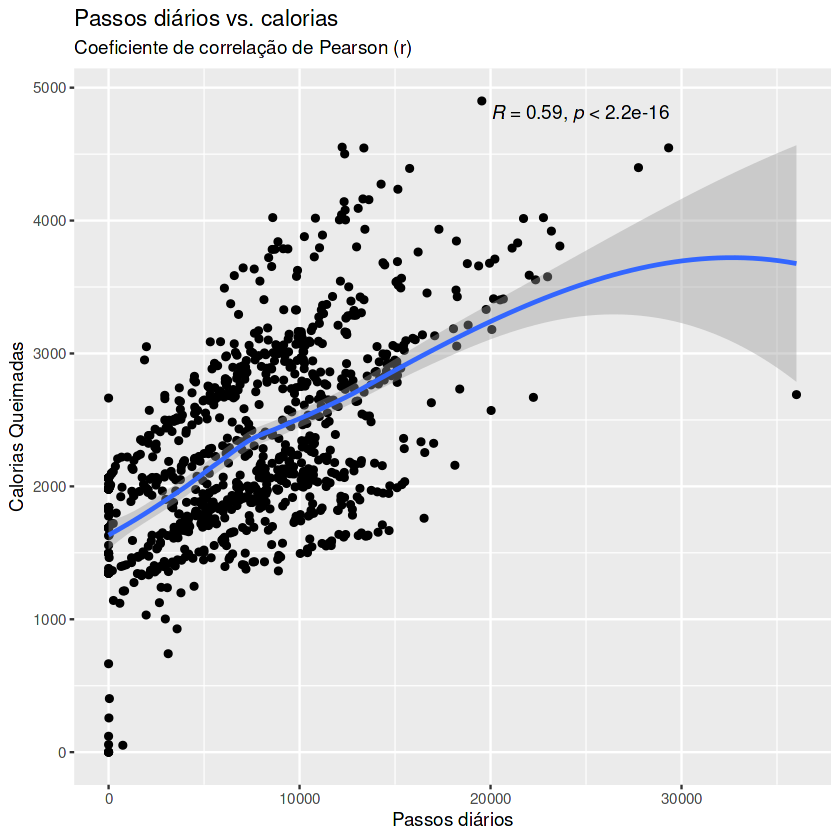

In [98]:
daily_activity_file %>%
  ggplot() +
  (mapping = aes(x = total_steps, y = calories)) +
  geom_jitter() +
  geom_smooth() +
  stat_cor(method = "pearson", label.x = 20000, label.y = 4800) +
  scale_color_igv() +
  scale_fill_igv() +
  theme_grey() +
  labs(
    title = "Passos diários vs. calorias",
    subtitle = "Coeficiente de correlação de Pearson (r)",
    x = "Passos diários",
    y = "Calorias Queimadas"
  )

A escala do coeficiente de [Correlação de Pearson](https://www.scribbr.com/statistics/pearson-correlation-coefficient/) R = 0,59 [(correlação moderada)](https://www.researchgate.net/figure/The-scale-of-Pearsons-Correlation-Coefficient_tbl1_345693737), entre 0 e 1 é uma correlação positiva. Podemos identificar que temos uma correlação moderada isso nos diz que outros fatores podem estar afetando/colaborando para tal projeção do nosso conjunto de dados, fatores como: passos mais rápidos dos usuários...

Vamos dar uma olhada na intensidade x calorias para identificamos se haverá uma correlação entre esses dados.

<a id="subsection4-three"></a>
### Calorias x intensidade

`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


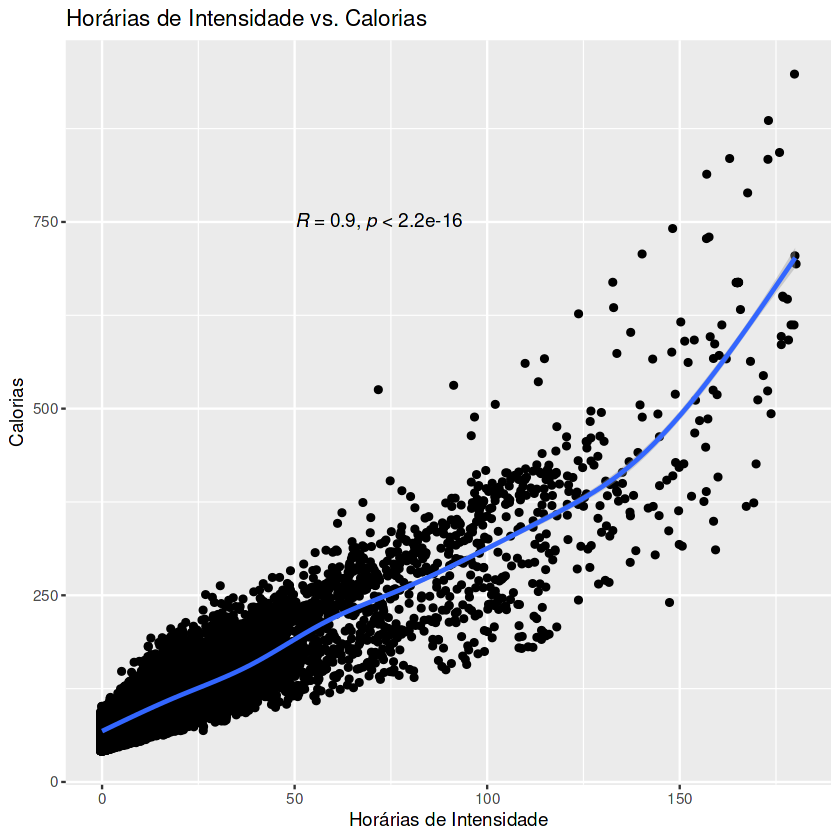

In [140]:
graph_intensidade_calorias <- hourly_intensities_file %>%
  group_by(day) %>%
  summarise(total_int = total_intensity, total_cal = calories) %>%
  ggplot() +
  (mapping = aes(x = total_int, y = total_cal)) +
  geom_jitter() +
  geom_smooth() +
  stat_cor(method = "pearson", label.x = 50, label.y = 750) +
  labs(
    title = "Horárias de Intensidade vs. Calorias",
    x = "Horárias de Intensidade",
    y = "Calorias"
  )
graph_intensidade_calorias

Agora podemos notar uma correlação muito alta; 0,9. Quando uma variável muda, a outra variável muda na mesma direção.

<a id="subsection4-four"></a>
## Total de Passos diários Vs. Total de Minutos de Sono

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


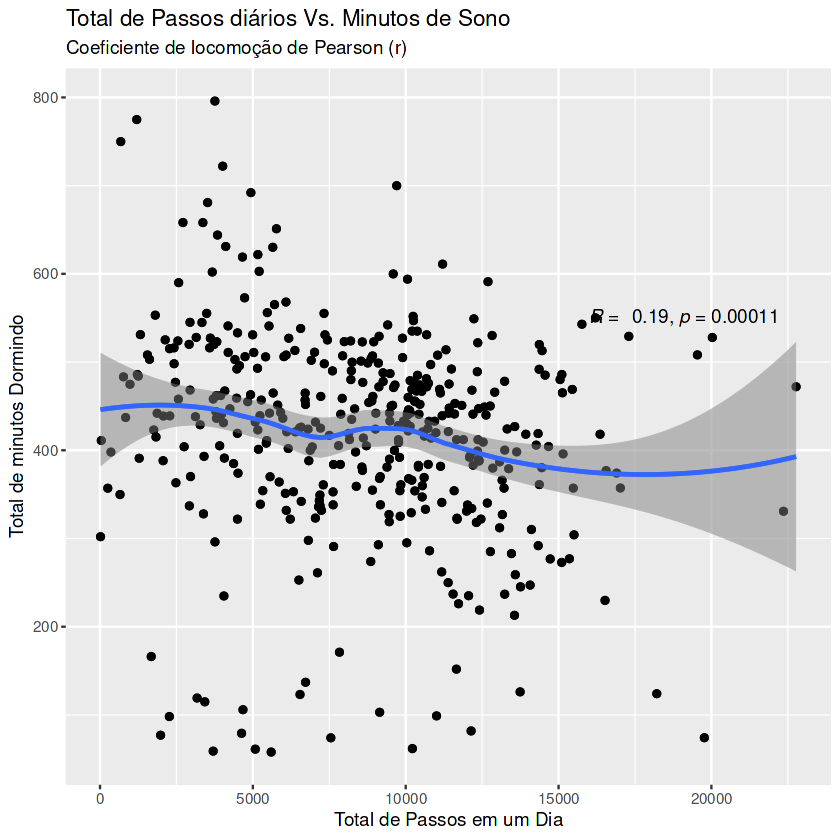

In [139]:
graph_passos_sono <- activity_sleep %>% 
    ggplot(
     mapping = aes(x = total_steps, y = total_minutes_asleep)) +
      geom_point() +
      geom_smooth() +
      geom_jitter() +
      geom_smooth() +
      stat_cor(method = "pearson", label.x = 16000, label.y = 550) +
      scale_color_igv() +
      scale_fill_igv() +
      theme_grey() +
      labs(
        title = "Total de Passos diários Vs. Minutos de Sono",
        subtitle = "Coeficiente de locomoção de Pearson (r)",
        x = "Total de Passos em um Dia",
        y = "Total de minutos Dormindo"
      )
graph_passos_sono

Diferentemente do gráfico de passos e calorias queimadas, em que quanto mais passos forem percorridos mais calorias podem ser queimadas.

Neste gráfico de passos e a quantidade de minutos que os usuários dormem por dia não há correlação entre as variáveis.

<a id="subsection4-five"></a>

## Tempo de sono

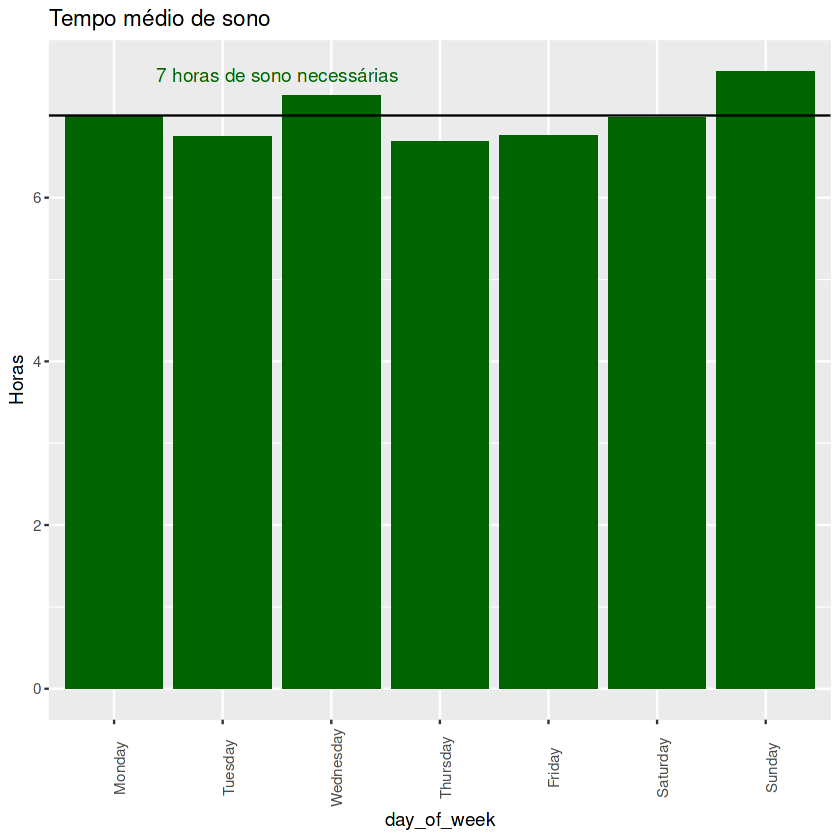

In [137]:
graph_sono_medio <- sleep_day_file %>% 
  group_by(day_of_week) %>% 
  summarise(avg_sleep = mean(total_minutes_asleep )/60) %>% 
  ggplot() +
  geom_col(mapping = aes(x= day_of_week, y = avg_sleep), fill = "darkgreen") +
  geom_hline(aes(yintercept = 7)) +
  annotate(geom="text", x=2.5, y= 7.5, label="7 horas de sono necessárias",
           color="darkgreen") +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Tempo médio de sono",
       y="Horas")
graph_sono_medio

<a id="subsection4-six"></a>

## Uso diário dos dispositivos

Vamos dar uma espiada de como esses dados se comportam em um gráfico.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


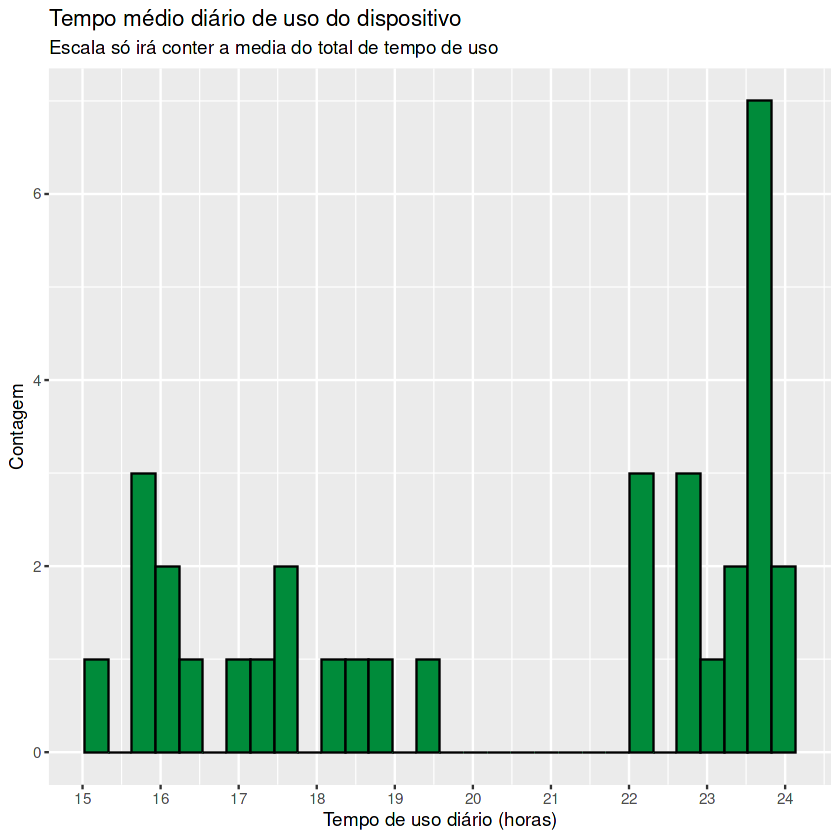

In [97]:
daily_activity_file %>%
  group_by(id) %>%
  summarise(daily_usage_hour = mean(total_time / 60)) %>%
  ggplot(aes(x = daily_usage_hour)) +
  geom_histogram(
    color = "black", fill = "#008b3a"
  ) +
  scale_color_igv() +
  scale_fill_igv() +
  theme_grey() +
  scale_x_continuous(breaks = c(1:24)) +
  labs(
    title = "Tempo médio diário de uso do dispositivo",
    subtitle = "Escala só irá conter a media do total de tempo de uso",
    x = "Tempo de uso diário (horas)",
    y = "Contagem"
  )

podemos identificar no gráfico a media de tempo que os usuarios passam usando o dispositivo inteligente.

*foi usado so pipes antifos %>% pois o kaggle nao estava identificando os novos |>*

<a id="section-five"></a>
# 5. Conclusão.

Quais são algumas tendências no uso de dispositivos inteligentes?

Existe uma forte correlação positiva entre o total de minutos ativos e o gasto calórico.


Quebrando as espectativas a quantidade de sono nao afetou a quantidade de passos no dia.

## Recomendações 

1. Coletar mais dados

O conjunto de dados baseado nos rastreadores pessoais Fitbit fornece informações úteis sobre as preferências do usuário com as quais a empresa pode aprender. Entretanto, o conjunto de dados fornece uma baixa variação de usuários para que possamos entender o perfil dos nossos clientes, contendo, apenas um conjunto de 33 usuários.
O nosso time de Dados recomenda a obtenção de mais dados para que possamos fundar nossas hypothesis com mais robustez.

   Como fazer: Seguindo as recomendações da [Lei Geral de Proteção de Dados (LGPD)](https://www.bndes.gov.br/wps/portal/site/home/transparencia/lgpd).
    
       Podemos fazer esse processo de obtenção de mais dados pela inclusão de descontos para a compra adicional ou recompensa do usuário por meio do aplicativo Fitbit por um tempo de uso mais longo para aqueles que aceitarem preencher os formulários e/ou conceder acesso aos seus dados de uso. Entre essas formas podemos, também, fazer a coleta dos cookies, estilo de navegação. É de extremamente importância estarmos seguindo as recomendações de regras sobre o uso e concessão de dados pessoais presentes na [LGPD](https://www.bndes.gov.br/wps/portal/site/home/transparencia/lgpd).